Library import

In [1]:
import pandas as pd
import numpy as np
#from cpi import inflate
import matplotlib.pyplot as plt

Files loading

#### A. Sequels

In [2]:
from src.models.movies_frame import MovieFrames

movie_df = pd.read_csv('data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
new_movie_df = pd.read_csv('data/random_sample/random_sample_metadata_2010_2024.csv')

keywords = ["sequels", "book", "comics", "remake"]
path_old = []
path_new = []

for keyword in keywords:
    path_old.append(f"data/{keyword}/{keyword}_with_wiki_id_1880_2010.csv")
    path_new.append(f"data/{keyword}/{keyword}_metadata_2010_2024.csv")

path_old.append("data/collections/sequels_and_original_with_wiki_id.csv")
path_new.append("data/collections/sequels_and_original_metadata_2010_2024.csv")

movie_frames_old = MovieFrames(movie_df, path_old, old=True)
movie_frames_new = MovieFrames(new_movie_df, path_new)


Inner join between "movie_df" and sequels with their Wikipedia ID

Filtering movies by consistent release year

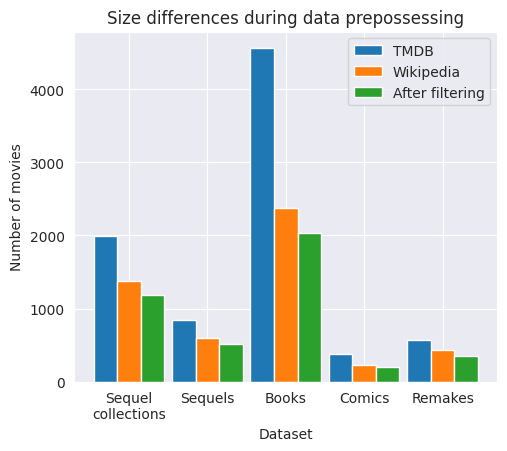

In [3]:
## Size differences
from src.models.movie_data_cleaner import display_data_cleaning_graph
fig = display_data_cleaning_graph(movie_frames_old)

plt.show()

### 3.1 How many sequels are there compared to movies 

Groups the movies by 5-year intervals, counts how many movies fall into each interval, and returns the string representation of the interval labels

Plot of number of movies per 5 year (left figure) VS. Plot of number of movies with sequels per 5 year (right figure)

In src.models.movie_counter script, we want make functions for analyzing and visualizing trends in movie data over time, focusing on grouping movies by release years and calculating ratios for specific categories like sequels, books, comics, and remakes.   
We define 5 function including:  movies_per_year; figure_movie_year; get_movie_counter_figure; plot_ratio; get_ratio_movie_figure; 

**movies_per_year**: Groups movies into 5-year intervals based on their release years. Counts the number of movies in each interval and returns both the counts and the string representation of interval labels.   
**figure_movie_year**: Plots a bar chart for the number of movies (or a specific category like sequels) released in each interval.  
**get_movie_counter_figure**: Generates a multi-panel figure showing the number of movies (original and non-original categories) released over 5-year intervals from 1890 to 2010.Uses the figure_movie_year function to visualize trends for movies, sequels, books, comics, and remakes in separate subplots.  

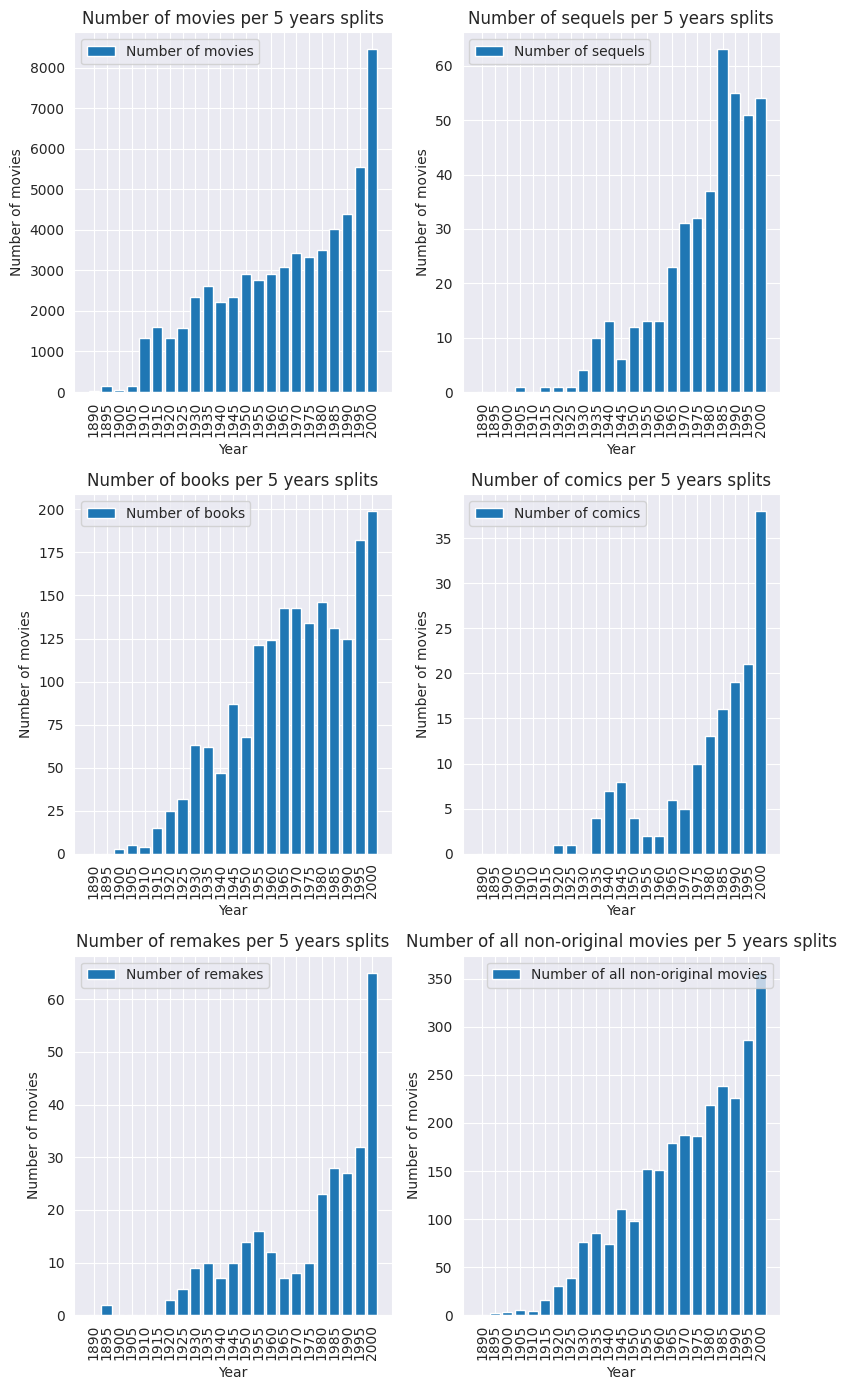

In [4]:
from src.models.movie_counter import get_movie_counter_figure

#Plot figure 1 (left):  number of movies per 5 years
fig = get_movie_counter_figure(movie_frames_old)

plt.tight_layout()
plt.show()

Period such as the 1940s (World War II) show fluctuations, which may reflect the broader historical impact on media production and distribution. Events like the Great Depression and wars likely influenced both the content and frequency of media releases.

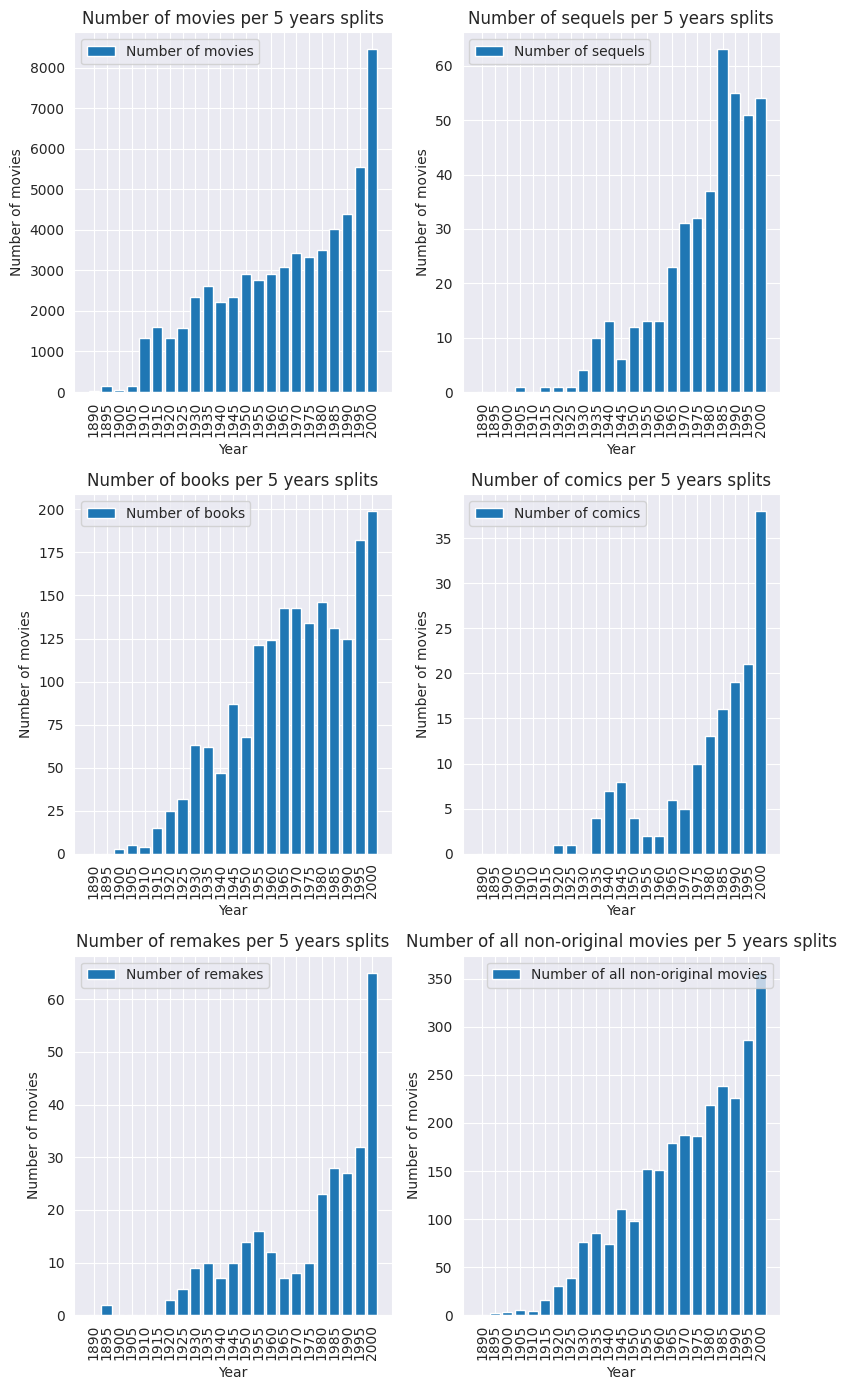

In [5]:
fig = get_movie_counter_figure(movie_frames_old)

plt.tight_layout()
plt.show()

$$
\text{Ratio} = \frac{\text{nb of movie with sequel per 5 year}}{\text{nb of movie per 5 year}}
$$

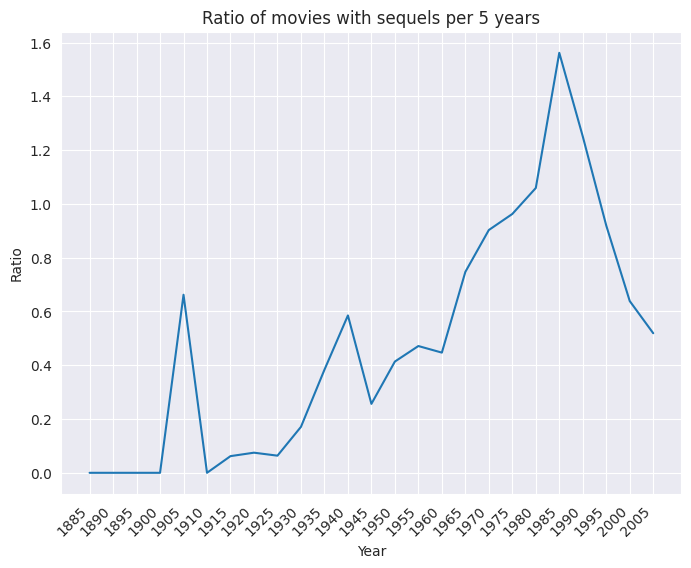

In [8]:

from src.models.movie_counter import get_ratio_movie_figure

fig = get_ratio_movie_figure(movie_frames_old)
plt.xticks(rotation=45, ha='right')
plt.show()

**plot_ratio**: Calculates and plots the ratio of movies with sequels as a percentage of total movies released in each 5-year interval.Then returns a line chart displaying the trend of sequel ratios over time.
**get_ratio_movie_figure**: ntegrates the plot_ratio function with a MovieFrames object to analyze and visualize the sequel ratio trends directly from the data structure.

## 3.2 Box office revenue

#### 3.2.1 Box office revenue for movies with sequels compared to all movies

Creation of a function, using the Consumer Price Index (CPI), that calaculate the inflation adjustement for each movies based on their released year

Box office revenues inflation adjustement for other movies with sequels dataframe

Calculation and plot of total box office revenue per year

In [ ]:
from models.box_office_revenue import get_box_office_absolute

# Plot figure 4: box office revenue per year
get_box_office_absolute(movie_frames_old)
plt.show()

Calculation and plots the percentage of box office revenue each year contributed by movies with sequels, relative to the total box office revenue for all movies that year

$$
\text{Box Office \%} = \frac{\text{Box office of movies with sequel per year}}{\text{Box office for all movies per year}} * 100
$$

In [ ]:
# calculate the percentage of box office revenue from movies with sequels

box_office_percentage = box_office_sequel_per_year / box_office_per_year * 100

# Plot figure 5: box office revenue percentage per year

box_office_percentage_plot, ax = plt.subplots()
ax.bar(box_office_percentage.index, box_office_percentage, label="Box office revenue percentage", width=1)
ax.legend(loc='upper left')
ax.title.set_text("Box office revenue percentage from 1970")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage (%)")
plt.show()

Calculation and plot of the average inflation-adjusted box office revenue per year, both for all movies and for movies with sequels

In [ ]:
#calculate box office revenue per movie and fill NaN values with 0

average_box_office = movie_df.dropna(subset = ['Movie box office revenue inflation adj']).groupby("release year")["Movie box office revenue inflation adj"].agg('mean')
average_box_office = average_box_office.fillna(0)

#calculate box office revenue per movie for movies with sequels and fill NaN values with 0

average_box_office_sequel = movie_df_sequel_only.dropna(subset = ['Movie box office revenue inflation adj']).groupby("release year")["Movie box office revenue inflation adj"].agg('mean')
average_box_office_sequel = average_box_office_sequel.fillna(0)

# Plot figure 6: average box office revenue per year

average_box_office_plot, ax = plt.subplots()
ax.plot(average_box_office.index, average_box_office, label="Average box office revenue")
ax.plot(average_box_office_sequel.index, average_box_office_sequel, label="Average box office revenue sequel")

plt.draw()                                                  # Draw the plot to get the current y-axis offset
y_axis_offset = ax.get_yaxis().get_offset_text().get_text() # get the scientific notation multiplier from the axis and use it in the label
ax.set_ylabel(f"Revenue [{y_axis_offset}$]")
ax.get_yaxis().get_offset_text().set_visible(False)         # remove the scientific notation from the axis to avoid duplication
ax.legend()
ax.set_title("Average Box Office Revenue per Year")
plt.show()

#### 3.2.2 Box office revenue for movies with sequel compared to the first movie of the collection

In [ ]:
#identify and calculate the box office revenue of the first movie in each collection

box_office_first_movie = movie_df_sequel_original.sort_values("release_date").groupby("collection").first()["Movie box office revenue inflation adj"]

#calculate the remaining box office revenue for each collection

box_office_remainder = movie_df_sequel_original.groupby("collection")["Movie box office revenue inflation adj"].agg('sum') - box_office_first_movie

#calculate the remaining box office revenue for each collection (excluding the first movie)

box_office_remainder_avg = box_office_remainder / (movie_df_sequel_original.groupby("collection").count()["Movie name"] - 1)

Creation of new DataFrame in order to store first movie and remain movies box office value

In [ ]:
first_vs_rest = pd.DataFrame()
first_vs_rest["first"] = box_office_first_movie
first_vs_rest["rest"] = box_office_remainder
first_vs_rest["rest_avg"] = box_office_remainder_avg

first_vs_rest = first_vs_rest[first_vs_rest["rest"] > 0]                #remove collections with no revenue
first_vs_rest = first_vs_rest.sort_values("first", ascending=True)      #sort in ascending order for the first movie (lowest to the highest)

In [ ]:
first_vs_rest['index'] = range(0, len(first_vs_rest))

Plot the comparison between first and remaining movie of collections

In [ ]:
fig = plt.figure(figsize=(12, 10))

#calculate the average adjusted box office revenue for all movies

average_movie_revenue = movie_df.dropna(subset = ['Movie box office revenue inflation adj'])["Movie box office revenue inflation adj"].agg('mean')

#Plot figure 7: first movie vs sequel movie box office revenue

ax1 = fig.add_subplot(221)
x = first_vs_rest["index"]
y1 = first_vs_rest["first"]
y2 = first_vs_rest["rest"]
ax1.plot(x, y1, 'ks', markersize = 4, label="First movie box office revenue")
ax1.plot(x, y2, 'bo', markersize = 4, label="Sequel movie box office revenue")

ax1.plot((x[y1>y2],x[y1>y2]),(y1[y1>y2], y2[y1 > y2]),c= "red", alpha=0.5)      #the first movie has a lower revenue than the sequel
ax1.plot((x[y1<y2],x[y1<y2]),(y1[y1<y2], y2[y1 < y2]),c= "green", alpha=0.5)    #the first movie has a higher revenue than the sequel

ax1.legend()
ax1.title.set_text("First movie vs Sequel movie box office revenue")
ax1.set_xlabel("Collection")
ax1.set_ylabel("Box office revenue")
ax1.set_yscale("log")

#Plot figure 8: first movie vs average sequel movie box office revenue

ax2 = fig.add_subplot(222)
x = first_vs_rest["index"]
y1 = first_vs_rest["first"]
y2 = first_vs_rest["rest_avg"]
ax2.plot(x, y1, 'ks', markersize = 4, label="First movie box office revenue")
ax2.plot(x, y2, 'bo', markersize = 4, label="Sequel movie box office revenue average")

ax2.plot((x[y1>y2],x[y1>y2]),(y1[y1>y2], y2[y1 > y2]),c= "red", alpha=0.5)                                  #the first movie has a lower revenue than the average sequel
ax2.plot((x[y1<y2],x[y1<y2]),(y1[y1<y2], y2[y1 < y2]),c= "green", alpha=0.5)                                #the first movie has a higher revenue than the average sequel
ax2.axhline(y=average_movie_revenue, color='y', linestyle='-', label="Average movie box office revenue")    #average revenue for all movies

ax2.legend()
ax2.title.set_text("First movie box vs average Sequel movie box office revenue")
ax2.set_xlabel("Collection")
ax2.set_ylabel("Box office revenue")
ax2.set_yscale("log")

plt.show()


These plots highlight where the first movie outperforms the sequel (red lines) and vice versa (green lines). The second plot also includes a yellow horizontal line showing the average box office revenue of all movies in the dataset.

The log scale on the y-axis is used to better visualize large differences in revenue, especially when there are very high values.

## 4. Number of movies in a collection

In [ ]:
movie_df_sequel_original

In [ ]:
#total number of movies in each collection

collection_size = movie_df_sequel_original.groupby("collection").count()["Movie name"]

#total inflation adjusted box office revenue for each collection

box_office_revenue = movie_df_sequel_original.groupby("collection")["Movie box office revenue inflation adj"].agg('sum')

sequels_extended = pd.read_csv("data/sequels/sequels_extended_1880_2010.csv") #dataframe with additional budget information
#movie_df_sequel_original = pd.merge(movie_df_sequel_original, sequels_extended[["id", "budget"]], on="id", how="inner") 

#total budget for each collection

budget_df = movie_df_sequel_original.groupby("collection")["budget"].agg('sum')

In [ ]:
len(collection_size) #nb of unique collection with sequels

Plot of the comparison between the Budget and the Box office revenue for collection

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)

ax.scatter(budget_df, box_office_revenue, s = collection_size * 50, alpha=0.5, c = box_office_revenue, cmap="cool")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Budget")
ax.set_ylabel("Box office revenue")

ax.set_xlim(xmin = 1e5)
ax.set_ylim(ymax = 5e11)

ax.title.set_text("Budget vs Box office revenue")
plt.show()

In [ ]:
#Plot figure 10: number of movies in a collection

fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot()
ax1.bar(collection_size['Movie name'], collection_size["count"], label="Number of movies in collection")
ax1.legend()
ax1.title.set_text("Number of movies in a collection")
ax1.set_xlabel("Number of sequels")
ax1.set_ylabel("Number of movies")

plt.show()

## Other line of enquiry:

- Highest grossing series
- By genre
- Find studios that do a lot of sequels
- Is there a correlation between the box office revenue of the first movie and the sequels
- Add more box office revenue data and get movie budget data
- ...